Import the Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import the dataset

df=pd.read_csv("/content/drive/MyDrive/DSC 630/sandeep 1.csv")
df.head(3)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

### Data Preparation

Some categorical variables were imported as int such as Education, RelationshipSatisfaction, JobInvolvement etc, they need to be restructured.

In [4]:
# Recode values in Education

df['Education'].value_counts()

3    572
4    398
2    282
1    170
5     48
Name: Education, dtype: int64

In [5]:
educ = [1,2,3,4,5]
status = ["Below College", "College", "Bachelor", "Master", "Doctor",]

df['Education'] = df['Education'].replace(educ, status)

In [6]:
df['Education'].value_counts()

Bachelor         572
Master           398
College          282
Below College    170
Doctor            48
Name: Education, dtype: int64

#### Recode the following variables as categorical values
* EnvironmentalSatisfaction
* JobInvolvement
* JobSatisfaction
* RelationshipSatisfaction

These 4 variables were rated as 'Low', 'Medium', 'High', 'Very High'

In [7]:
# Recode EnvironmentalSatisfaction

df['EnvironmentSatisfaction'].value_counts()

3    453
4    446
2    287
1    284
Name: EnvironmentSatisfaction, dtype: int64

In [8]:
values = [1,2,3,4]
levels = ['Low','Medium','High','Very High']

In [9]:
df[['EnvironmentSatisfaction','JobInvolvement',
    'JobSatisfaction','RelationshipSatisfaction']] = df[['EnvironmentSatisfaction','JobInvolvement','JobSatisfaction',
                                                         'RelationshipSatisfaction']].replace(values,levels)

In [10]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,College,Life Sciences,1,1,...,Low,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,Below College,Life Sciences,1,2,...,Very High,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,College,Other,1,4,...,Medium,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,Master,Life Sciences,1,5,...,High,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,Below College,Medical,1,7,...,Very High,80,1,6,3,3,2,2,2,2


In [11]:
# Recode WorkLifeBalance

work = [1,2,3,4]
balance = ['Bad','Good','Better','Best']

df['WorkLifeBalance'] = df['WorkLifeBalance'].replace(work,balance)

In [12]:
df['WorkLifeBalance'].value_counts()

Better    893
Good      344
Best      153
Bad        80
Name: WorkLifeBalance, dtype: int64

In [13]:
# Recode Performance Rating

perform = [1,2,3,4]
rating = ['Low','Good','Excellent','Outstanding']

df['PerformanceRating'] = df['PerformanceRating'].replace(perform,rating)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   object
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   object
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   object
 14  JobLevel                

### Delete unuseful columns

* EmployeeCount
* EmployeeNumber
* Over18

In [15]:
df = df.drop(['EmployeeCount','EmployeeNumber','Over18'],axis=1)

In [16]:
df.shape

(1470, 32)

## Exploratory Data Analysis

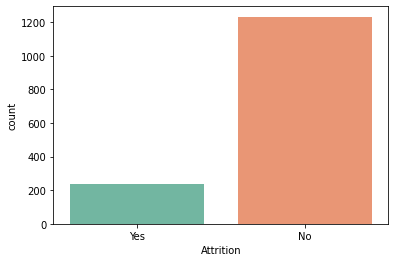

In [17]:
# Ploting attrition

sns.countplot(data=df, x='Attrition',palette='Set2');

In [18]:
df['Attrition'].value_counts(normalize=True)

No     0.838776
Yes    0.161224
Name: Attrition, dtype: float64

Only 16 percent attrition rate was reported during the review period.  The ratio of attrition to non-attrition is highly imbalanced which can lead to bias in our result if we use accuracy as a measure of perforamance.  We are going to oversample the minortity class to reduce the level of imbalance.

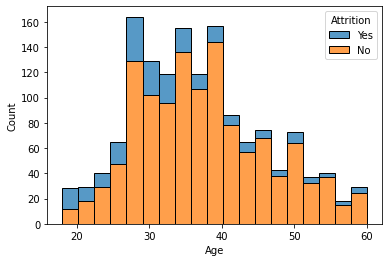

In [19]:
# Age and churn

sns.histplot(data=df, x="Age", hue="Attrition", multiple="stack");

The ratio of attrition to non-attrition is much higher for employees below the age of 35 years.  The ratio falls progressively with increase in age.  The ratio of attrition is almost 50% of among employees of 18-24 years old.

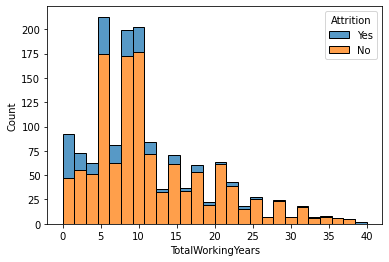

In [20]:
# Work Experience and attrition

sns.histplot(data=df, x="TotalWorkingYears", hue="Attrition", multiple="stack");

The ratio of attrition to non-attrition in the first year is very high compared to all other years of working experience. The ratio declined progressively after 10 years of working experience.

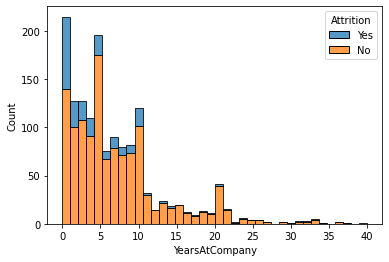

In [21]:
# Number of years working with the company

sns.histplot(data=df, x="YearsAtCompany", hue="Attrition", multiple="stack");

The number of workers with 1 year and 5 years of working experience were the highest while the proportion of attrition was recorded among those with little working experience in the company.

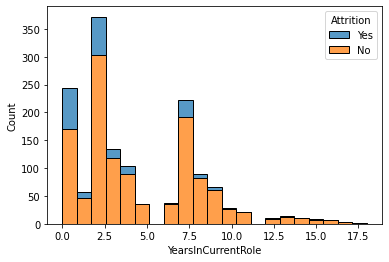

In [22]:
# Years in current Role vs attrition

sns.histplot(data=df, x="YearsInCurrentRole", hue="Attrition", multiple="stack");


The ratio of attrition seemed to be much larger among employees who spent less than 1 year in their currently role, followed by those who spent 2 years.

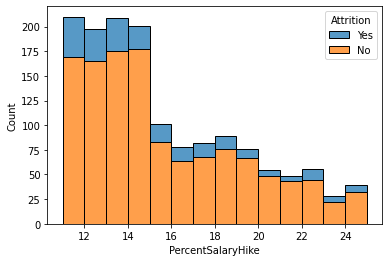

In [23]:
sns.histplot(data=df, x="PercentSalaryHike", hue="Attrition", multiple="stack");

A good number of the workers experienced a salary hike of between 10 and 15 per cent, while other workers experienced a hike of between 16 and 25 per cent.

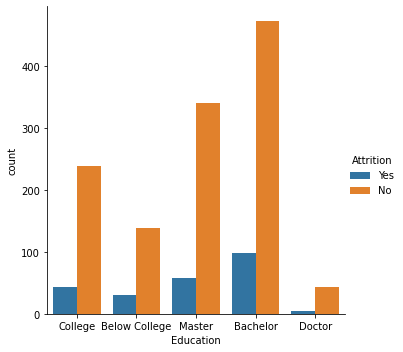

In [24]:
# Attrition by Education

sns.catplot(data=df,x='Education',kind='count',hue='Attrition');

The highest number of attrition was recorded among employees with Bachelor's degree, however, looking at the proprotion of attrition to non-attrition, those below college degree seem to be much prevalent.

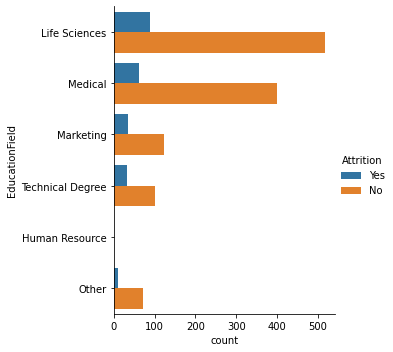

In [25]:
# Attrition by Education Field

sns.catplot(data=df,y='EducationField',kind='count',hue='Attrition',order=['Life Sciences','Medical','Marketing','Technical Degree',
                                                                           'Human Resource','Other']);

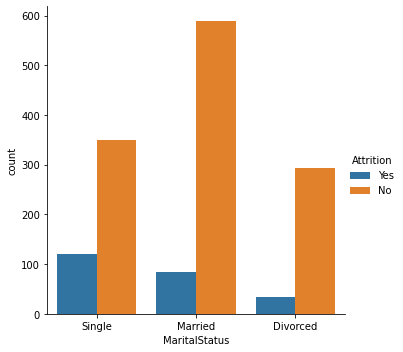

In [26]:
# Attrition by Martial Status

sns.catplot(data=df,x='MaritalStatus',kind='count',hue='Attrition');

The proportion of attrition is about 1/3rd of single employees, while it is about 1/6th of married employees.  The ratio seemed to be lowest among divorced employees. 

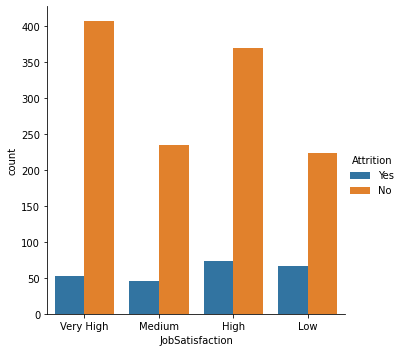

In [27]:
sns.catplot(data=df,x='JobSatisfaction',kind='count',hue='Attrition');

The proportion of attrition is much higher among employees with low job satisfaction. Again, those with medium job satisfaction recorded some attrition that is next to those with low job satisfaction.

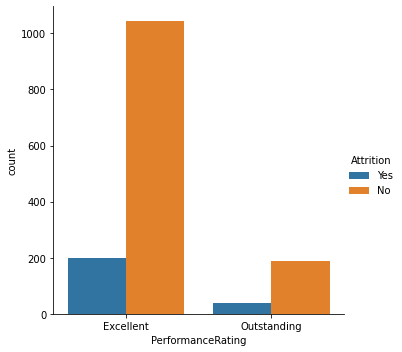

In [28]:
sns.catplot(data=df,x='PerformanceRating',kind='count',hue='Attrition');

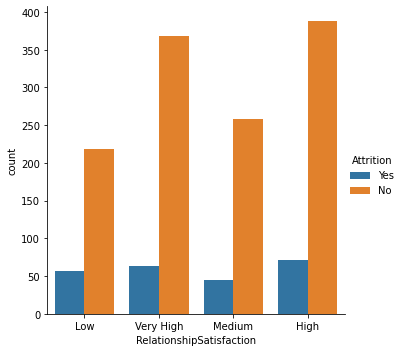

In [29]:
sns.catplot(data=df,x='RelationshipSatisfaction',kind='count',hue='Attrition');

A greater proprotion of the employees seemed to experience good level of relationship satisfaction.  The bulk of the employees rated their satisfaction as High, which was closely followed by those who rated their satisfaction as very high.  The level of attrition seemed to be evenly distributed among the level of relationship categories.

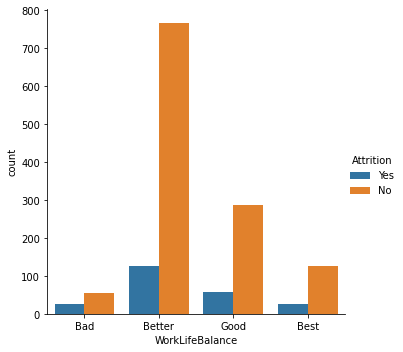

In [30]:
sns.catplot(data=df,x='WorkLifeBalance',kind='count',hue='Attrition');

The work life balance was rated on a 4-point rating scale, with Bad as the lowest followed by Good, Better and Best respectively.  Most of the employees rated their work-life balance as Better followed by Good.  Less than 10% of the workers considered their work life balance as best, while very few considered theirs as Bad.  Among those those that feels they experienced Bad worklife balance, about 50% attrition was recoreded.

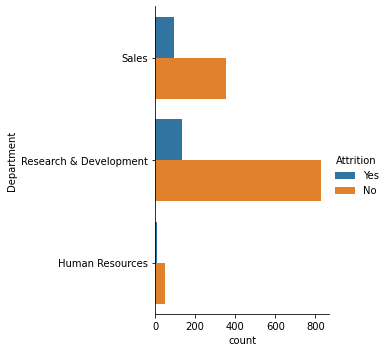

In [31]:
# Department and Attrition

sns.catplot(data=df,y='Department',kind='count',hue='Attrition');

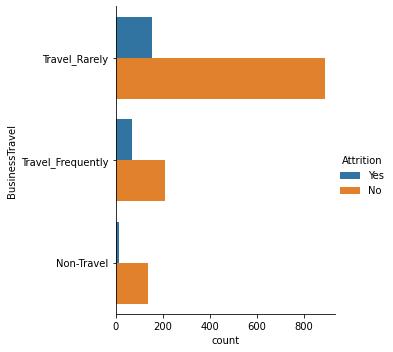

In [32]:
#  Business travels by attrition

sns.catplot(data=df,y='BusinessTravel',kind='count',hue='Attrition');

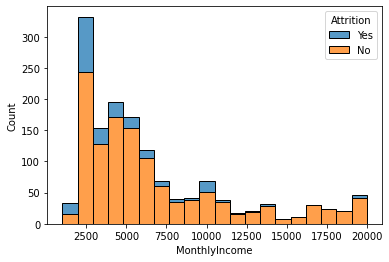

In [33]:
# Monthly Income and Attrition

sns.histplot(data=df, x="MonthlyIncome", hue="Attrition", multiple="stack");

Attrition was prevalent among workers earning a monthly income of less than 7,500.  The bulk of attrition was found among those earning 2,500.

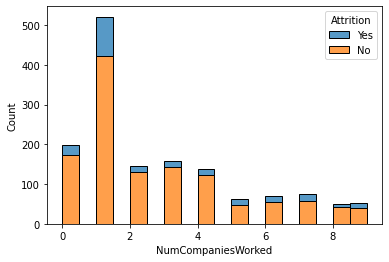

In [34]:
# Number of companies worked with versus attrition

sns.histplot(data=df, x="NumCompaniesWorked", hue="Attrition", multiple="stack");

### Model Building

Given that the minority class in data is just about 16%, I intend to oversample the class the correct the imbalance

In [35]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,College,Life Sciences,Medium,Female,...,Low,80,0,8,0,Bad,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,Below College,Life Sciences,High,Male,...,Very High,80,1,10,3,Better,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,College,Other,Very High,Male,...,Medium,80,0,7,3,Better,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,Master,Life Sciences,Very High,Female,...,High,80,0,8,3,Better,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,Below College,Medical,Low,Male,...,Very High,80,1,6,3,Better,2,2,2,2


In [36]:
# Replace Values in Attrition as 1 and 0

df['Attrition'] = df['Attrition'].replace({'Yes':1,'No':0})

In [37]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,College,Life Sciences,Medium,Female,...,Low,80,0,8,0,Bad,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,Below College,Life Sciences,High,Male,...,Very High,80,1,10,3,Better,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,College,Other,Very High,Male,...,Medium,80,0,7,3,Better,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,Master,Life Sciences,Very High,Female,...,High,80,0,8,3,Better,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,Below College,Medical,Low,Male,...,Very High,80,1,6,3,Better,2,2,2,2


In [38]:
abs(df.corr()['Attrition']).sort_values(ascending=False)

Attrition                  1.000000
TotalWorkingYears          0.171063
JobLevel                   0.169105
YearsInCurrentRole         0.160545
MonthlyIncome              0.159840
Age                        0.159205
YearsWithCurrManager       0.156199
StockOptionLevel           0.137145
YearsAtCompany             0.134392
DistanceFromHome           0.077924
TrainingTimesLastYear      0.059478
DailyRate                  0.056652
NumCompaniesWorked         0.043494
YearsSinceLastPromotion    0.033019
MonthlyRate                0.015170
PercentSalaryHike          0.013478
HourlyRate                 0.006846
StandardHours                   NaN
Name: Attrition, dtype: float64

### Convert the features to numeric values

In [39]:
data = pd.get_dummies(df,drop_first=True)

In [40]:
X = data.drop(['Attrition','HourlyRate','MonthlyRate','StandardHours'],axis=1)
y = df['Attrition']

In [41]:
# Using IBLEARM for random oversampling

!pip install imbalanced-learn

In [42]:
import imblearn
from imblearn.over_sampling import RandomOverSampler

In [43]:
# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy=0.75)
# fit and apply the transform
X_over, y_over = oversample.fit_resample(X, y)

In [44]:
y_over.value_counts(normalize=True)

0    0.571627
1    0.428373
Name: Attrition, dtype: float64

In [45]:
X_over.shape

(2157, 55)

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
# Get X_train, X_test, y_train and y_test

X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.20, random_state=42)

### Set up a pipeline

In [48]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest,mutual_info_classif, chi2, f_classif,VarianceThreshold

In [50]:
pipe = Pipeline([('scaler',StandardScaler()),
                 ('var',VarianceThreshold()),
                 ('selector',SelectKBest()),
                 ('classifier',LogisticRegression())])

In [51]:
search_space = [{'classifier':[LogisticRegression()],
                 'classifier__penalty':['l1','l2'],
                 'classifier__C':np.logspace(0,4,10)},
                {'classifier':[KNeighborsClassifier()],
                'classifier__n_neighbors':[3,5,8,11],
                 'classifier__weights':['uniform','distance']},
                {'classifier':[RandomForestClassifier()],
                 'classifier__n_estimators':[10,100,1000],
                 'classifier__max_features':[1,2,3]}]

In [52]:
import warnings

warnings.filterwarnings('ignore')

In [53]:
# Run the gridsearch

model = GridSearchCV(pipe,search_space,cv=10,verbose=0)
model.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('var', VarianceThreshold()),
                                       ('selector', SelectKBest()),
                                       ('classifier', LogisticRegression())]),
             param_grid=[{'classifier': [LogisticRegression()],
                          'classifier__C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                          'classifier__penalty': ['l1', 'l2']},
                         {'classifier': [KNeighborsClassifier()],
                          'classifier__n_neighbors': [3, 5, 8, 11],
                          'classifier__weights': ['uniform', 'distance']},
                         {'classifier': [RandomForestClassifier(max_features=1,
                                                    

In [54]:
best_estm = model.best_estimator_
print(best_estm)

Pipeline(steps=[('scaler', StandardScaler()), ('var', VarianceThreshold()),
                ('selector', SelectKBest()),
                ('classifier',
                 RandomForestClassifier(max_features=1, n_estimators=1000))])


In [56]:
model.best_score_

0.9402708697405565

In [57]:
best_estm.score(X_test,y_test)

0.9421296296296297

### Model Evaluation with confusion matrix and classification report

In [60]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix,plot_roc_curve

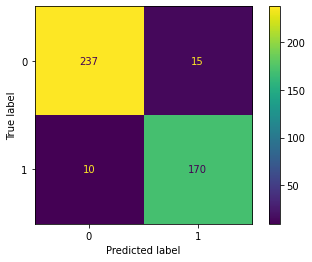

In [61]:
plot_confusion_matrix(model,X_test,y_test);

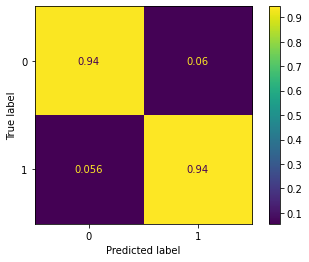

In [63]:
plot_confusion_matrix(model,X_test,y_test,normalize='true');

In [64]:
y_pred = model.predict(X_test)

In [65]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       252
           1       0.92      0.94      0.93       180

    accuracy                           0.94       432
   macro avg       0.94      0.94      0.94       432
weighted avg       0.94      0.94      0.94       432



###  Feature Importance Analysis

In [66]:
coef = model.best_estimator_.named_steps['classifier'].feature_importances_
importance = np.abs(coef)
importance 

array([0.16414912, 0.05332516, 0.20613022, 0.07075106, 0.1291383 ,
       0.10351413, 0.08392699, 0.08832539, 0.02919411, 0.07154552])

#### Get the names of the features *selected*

In [68]:
col_after_var = X_train.columns[best_estm['var'].get_support()]
mask_sel = best_estm['selector'].get_support(indices=True)
final_feature_cols = col_after_var[mask_sel]

In [69]:
# combine the coefficients with the variable names

SelectedFeatures = pd.Series(importance,final_feature_cols)
SelectedFeatures

Age                     0.164149
JobLevel                0.053325
MonthlyIncome           0.206130
StockOptionLevel        0.070751
TotalWorkingYears       0.129138
YearsAtCompany          0.103514
YearsInCurrentRole      0.083927
YearsWithCurrManager    0.088325
MaritalStatus_Single    0.029194
OverTime_Yes            0.071546
dtype: float64

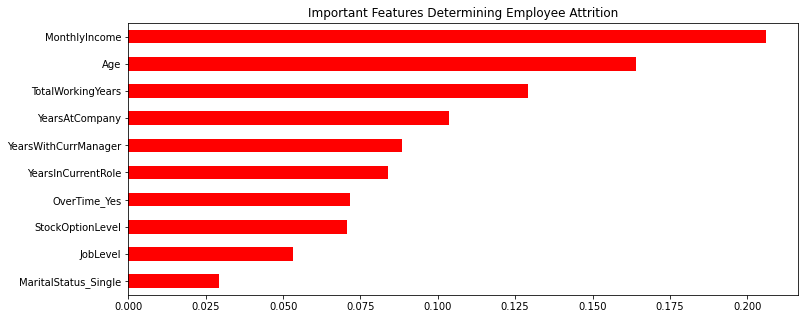

In [71]:
# Plot the features

SelectedFeatures.sort_values().plot.barh(color='red',figsize=(12,5))
plt.title('Important Features Determining Employee Attrition');